In [ ]:
import pandas as pd

# Load CSV from 'data' folder relative to notebook location
df = pd.read_csv('data/weatherHistory.csv')

print("Columns in the dataset:")
print(df.columns.tolist())

df.head()




In [ ]:
import numpy as np
import os

# Copy dataframe to avoid modifying original
df_clean = df.copy()

# Columns to convert to numeric
num_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
            'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
            'Visibility (km)', 'Pressure (millibars)']

# Convert to numeric and fill missing values with column mean
for col in num_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Fill missing categorical values with 'Unknown'
for col in ['Summary', 'Precip Type', 'Daily Summary', 'Loud Cover']:
    df_clean[col].fillna('Unknown', inplace=True)

print("Cleaned Data preview:")
display(df_clean.head())

# Create outputs folder if not exists
os.makedirs('outputs', exist_ok=True)

# Save cleaned CSV
df_clean.to_csv('outputs/cleaned_weather.csv', index=False)
print("Cleaned CSV saved to outputs/cleaned_weather.csv")



In [20]:
import numpy as np
import os

# Copy dataframe to avoid modifying original
df_clean = df.copy()

# Columns to convert to numeric
num_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 
            'Wind Speed (km/h)', 'Wind Bearing (degrees)', 
            'Visibility (km)', 'Pressure (millibars)']

# Convert to numeric and fill missing values with column mean
for col in num_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
    df_clean[col] = df_clean[col].fillna(df_clean[col].mean())

# Fill missing categorical values with 'Unknown'
for col in ['Summary', 'Precip Type', 'Daily Summary', 'Loud Cover']:
    df_clean[col] = df_clean[col].fillna('Unknown')

print("Cleaned Data preview:")
display(df_clean.head())

# Create outputs folder if not exists
os.makedirs('outputs', exist_ok=True)

# Save cleaned CSV
df_clean.to_csv('outputs/cleaned_weather.csv', index=False)
print("Cleaned CSV saved to outputs/cleaned_weather.csv")



Cleaned Data preview:


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Cleaned CSV saved to outputs/cleaned_weather.csv


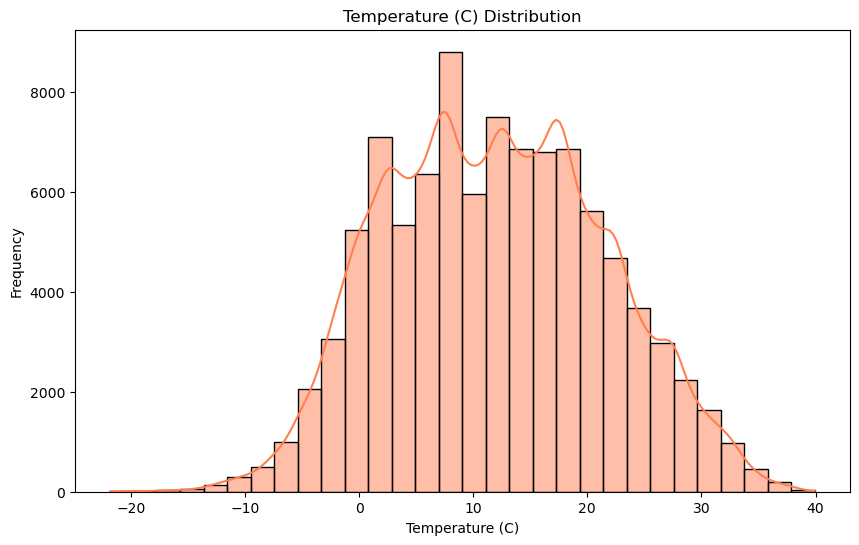

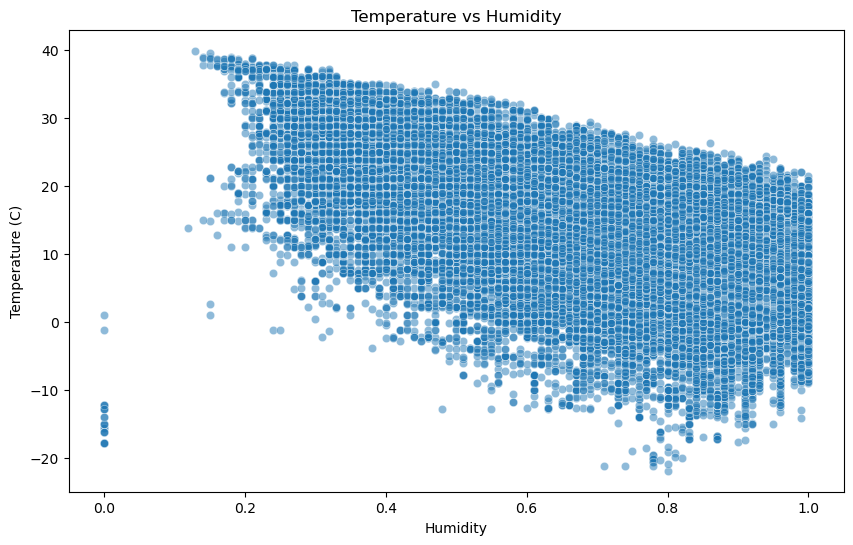

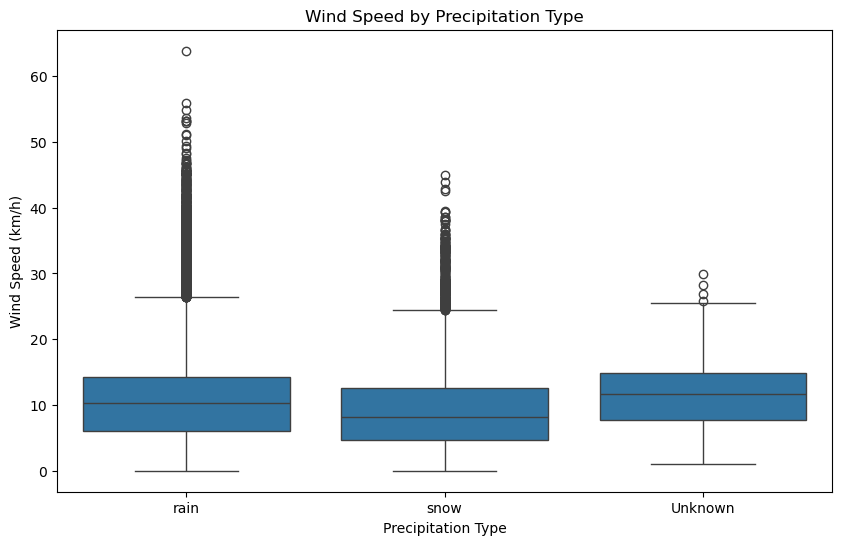

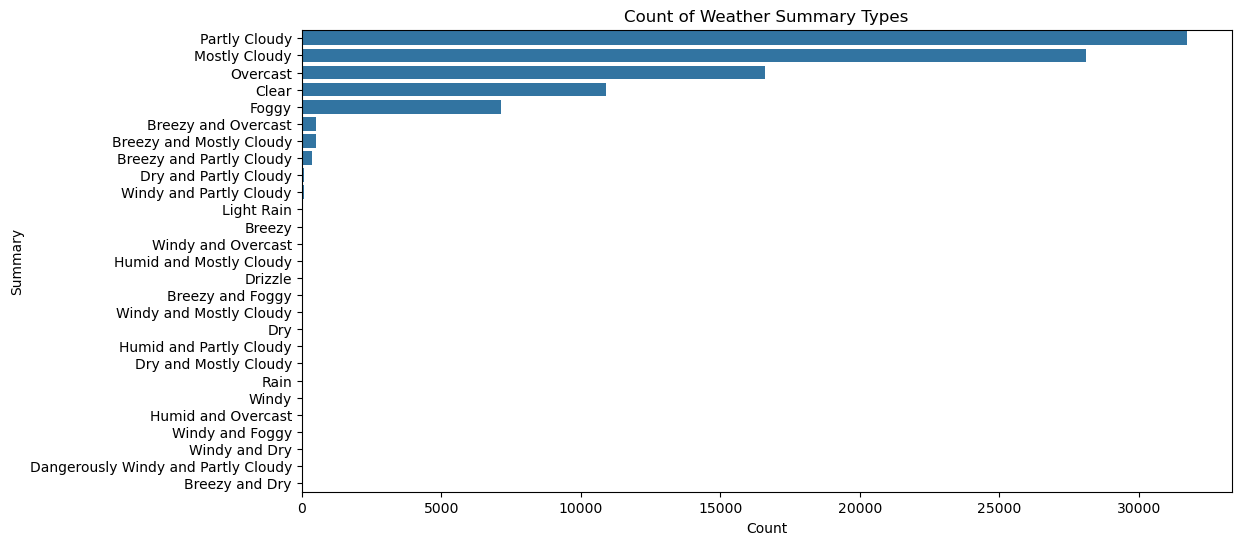

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Temperature Distribution
plt.figure(figsize=(10,6))
sns.histplot(df_clean['Temperature (C)'], bins=30, kde=True, color='coral')
plt.title('Temperature (C) Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

# Temperature vs Humidity Scatter Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Humidity', y='Temperature (C)', data=df_clean, alpha=0.5)
plt.title('Temperature vs Humidity')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.show()

# Wind Speed by Precipitation Type Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x='Precip Type', y='Wind Speed (km/h)', data=df_clean)
plt.title('Wind Speed by Precipitation Type')
plt.xlabel('Precipitation Type')
plt.ylabel('Wind Speed (km/h)')
plt.show()

# Count of Weather Summary Types
plt.figure(figsize=(12,6))
sns.countplot(y='Summary', data=df_clean, order=df_clean['Summary'].value_counts().index)
plt.title('Count of Weather Summary Types')
plt.xlabel('Count')
plt.ylabel('Summary')
plt.show()
